In [ ]:
# Bryan Ochoa July 27 2023 bochoa@lbl.gov

# characterization of piezoelectric displacement using
# data gathered using smaract picoscale interferometer gui, pasting results to a .txt file
# function generator producing a 1Hz Sin function, +5V peak to peak

In [143]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy import signal

In [273]:
with open('C:\\Users\\opticslab\\Documents\\Realm Project\\Realms Bochoa\\Piezoelectric Characterization\\Data\\1Hz_5V_Sin.txt', 'r') as file:
    lines = file.readlines()
x = []
y = []

for line in lines:
    values = line.strip().split()
    x.append(float(values[0]))
    y.append(float(values[1]))

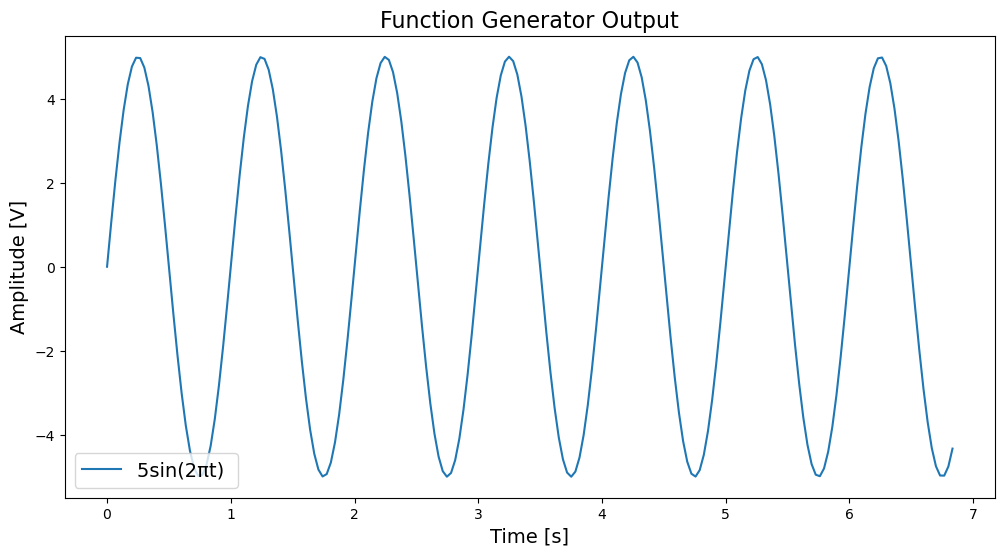

In [338]:
A = 5
N = len(x)    # Number of data points
Fs = 30   # Sampling frequency
Ts = 1.0 / Fs
j = np.linspace(0.0, N*Ts, N)
k = A*np.sin(2.0*np.pi*1*j)    # Cosine 1Hz
plt.figure(figsize=(12,6))
plt.title("Function Generator Output", fontsize = 16)
plt.ylabel("Amplitude [V]", fontsize = 14)
plt.xlabel("Time [s]", fontsize = 14)
plt.plot(j,k, label = "5sin(2\u03C0t) ")
plt.legend(fontsize = 14,loc = "lower left")
plt.show()

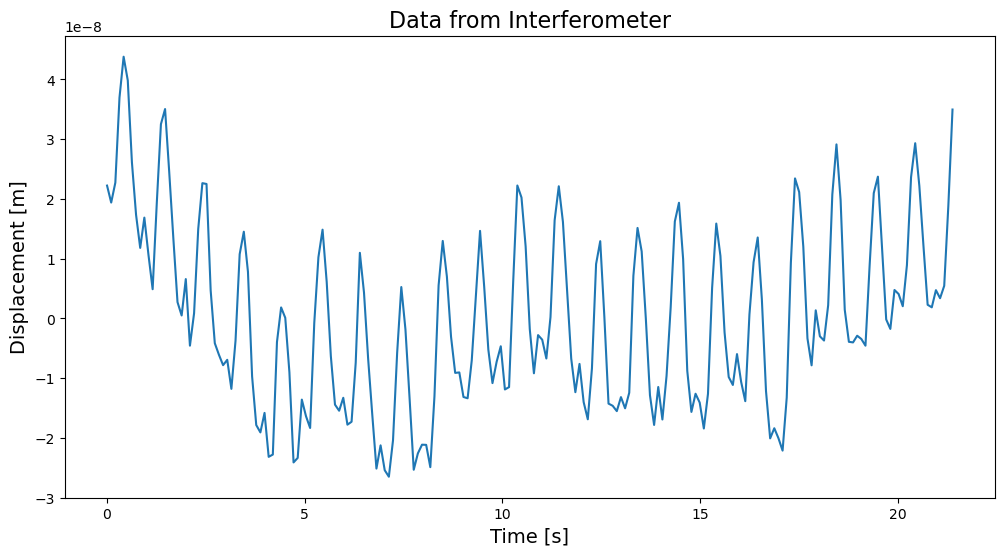

In [340]:

plt.figure(figsize=(12,6))
#plt.plot(x,y)
plt.plot(x,signal.detrend(y))
plt.title("Data from Interferometer", fontsize=16)
plt.xlabel('Time [s]', fontsize=14)
plt.ylabel('Displacement [m]', fontsize=14)
plt.show()

2.0734999999999993e-08


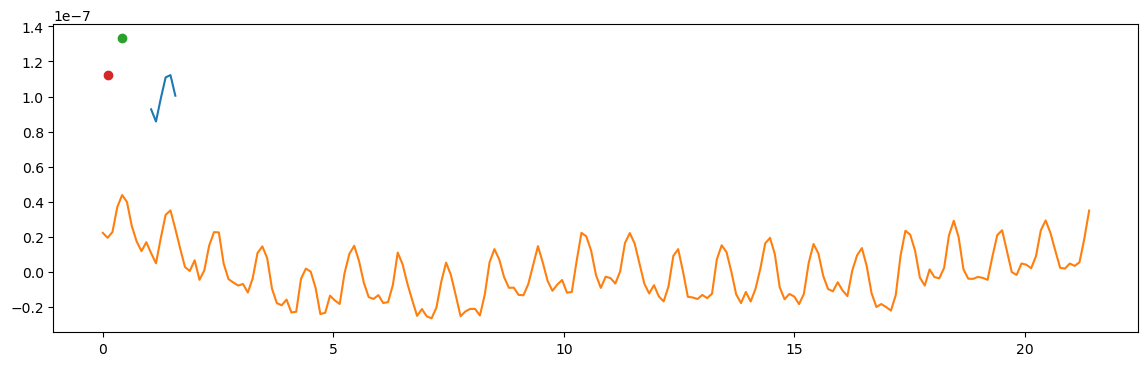

In [336]:
plt.figure(figsize=(14,4))
plt.plot(x[10:16],y[10:16])
plt.plot(x,signal.detrend(y))

xmin = np.argmin(y[10:16])
xmax = np.argmax(y[10:16])

plt.plot(x[xmax],y[xmax], marker = "o")
plt.plot(x[xmin],y[xmin], marker = "o")

dp = np.linalg.norm(y[xmax] - y[xmin])
print(dp)


0.000512195121951331


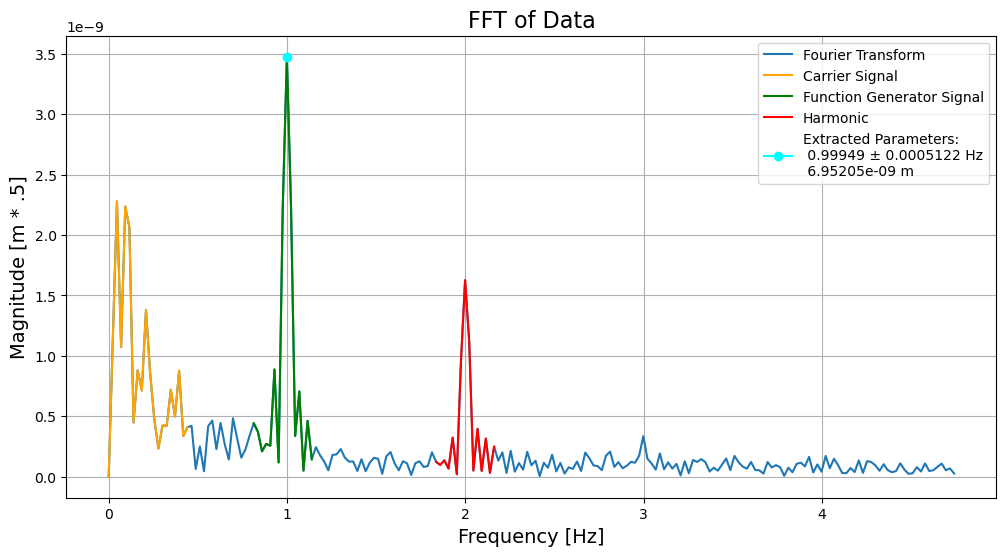

In [412]:
xnp = np.array(x)
ynp = np.array(signal.detrend(y))

N = 410                              #number of samples
fs = 9.53                            #sampling frequency
yf = np.abs(np.fft.fft(ynp,N)) / N   #fft
xf = np.fft.fftfreq(N, 1/fs)         #Frequency values

max_indx = np.argmax((yf))
freq = xf[max_indx]
mag = yf[max_indx]

# Plot the FFT magnitude
plt.figure(figsize=(12,6))
plt.plot(xf[xf>=0], (yf[:N//2]), label = "Fourier Transform")
plt.plot(xf[:20],(yf[:20]), color = 'orange', label = f"Carrier Signal")
plt.plot(xf[35:50],(yf[35:50]), color = 'green', label = f"Function Generator Signal")
plt.plot(xf[79:94],(yf[79:94]), color = 'red', label = f"Harmonic")

#print(np.max(yf[79:94]) * 2)
#plt.axhline(yf[max_indx], color='orange', linestyle='--', label=f"{mag:.5e}")
#plt.axvline(xf[max_indx], color='r', linestyle='--', label=f"{freq:.5} Hz")
abs_err = np.abs(freq - 1.0) / 1.0
print(abs_err)

plt.plot(xf[max_indx],yf[max_indx], marker = 'o', color = 'cyan', label = f"Extracted Parameters:\n {freq:.5} \u00B1 {abs_err:.5} Hz\n {2* mag:.5e} m ")
plt.xlabel('Frequency [Hz]', fontsize = 14)
plt.ylabel('Magnitude [m * .5]', fontsize = 14)
plt.title('FFT of Data', fontsize = 16)
plt.legend()
plt.grid(True)

plt.show()


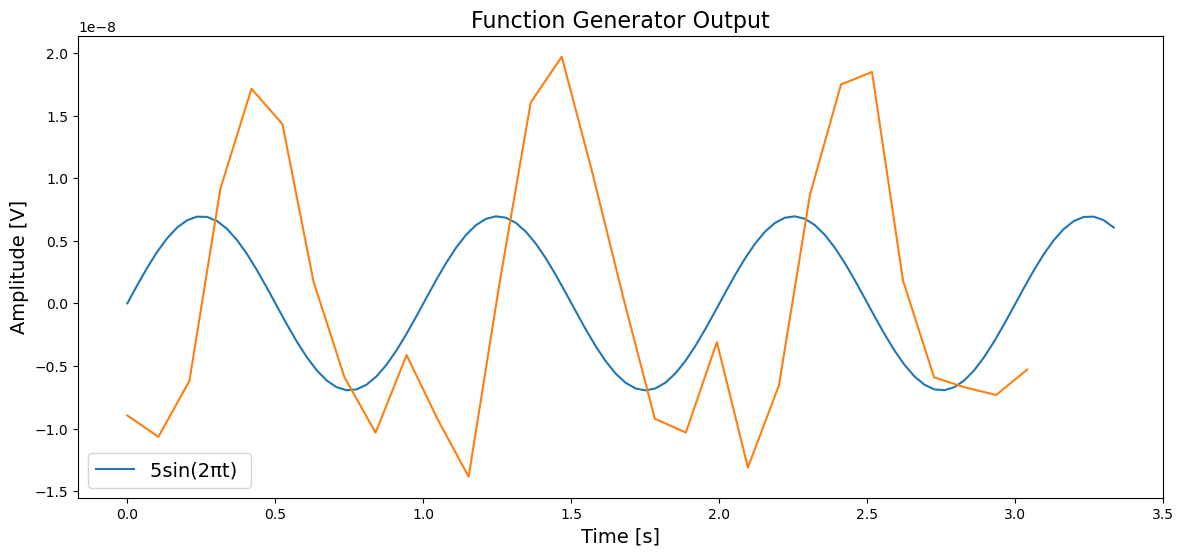

In [398]:
A = 2* mag
N = 100    # Number of data points
Fs = 30   # Sampling frequency
Ts = 1.0 / Fs
j = np.linspace(0.0, N*Ts, N)
k = A*np.sin(2.0*np.pi*freq*j)    # Cosine 1Hz
plt.figure(figsize=(14,6))
plt.title("Function Generator Output", fontsize = 16)
plt.ylabel("Amplitude [V]", fontsize = 14)
plt.xlabel("Time [s]", fontsize = 14)
plt.plot(j,k, label = "5sin(2\u03C0t) ")
plt.plot(x[:30],signal.detrend(y[:30]))
plt.legend(fontsize = 14,loc = "lower left")
plt.show()